# Método de Neville

El método de Neville es un algoritmo usado para evaluar el polinomio de interpolación de un conjunto de dados sin la necesidad de calcular explícitamente el polinomio completo.

**Definición.** Sea $f$ una función definida en $x_0, x_1, \ldots, x_n$ y supongamos que $m_1, m_2, \ldots, m_k$ son $k$ enteros distintos con $0 \leq m_i \leq n$ para cada $i$. El polinomio de Langrange que concincide con $x_{m_1}, x_{m_2}, \ldots, x_{m_k}$ se denota por $P_{m_1, m_2, \ldots, m_k}(x)$.

**Ejemplo.** 
Considere la siguiente tabla de datos 

|$x_i$| $x_0$|$x_1$|$x_2$|$x_3$|$x_4$|$x_5$|
|------|---------|---------|---------|---------|---------|---------|
|x| 5|-7|-6|0|1|4|
|y|1|-2|-5|-9|-2|8|    

Calcule el polinomio de interpolación de Lagrange $P_{2,4,5}(x)$.

p(t)= -0.0714285714285714*(t - 4)*(t - 1) + 0.0952380952380952*(t - 4)*(t + 6) + 0.266666666666667*(t - 1)*(t + 6)


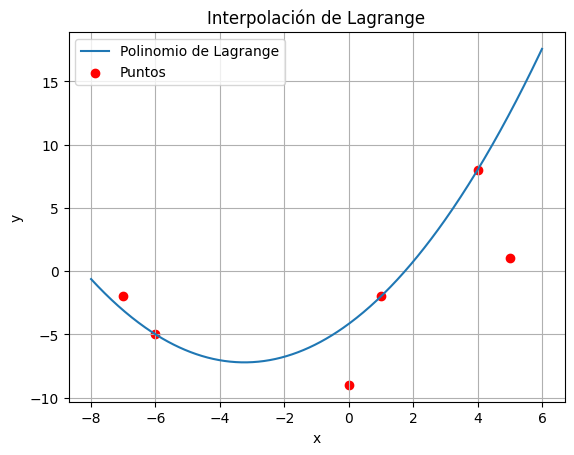

In [2]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

# Variable simbólica
t = sp. symbols('t')

#Declarar el cunjunto de datos
x = np.array([5,-7,-6,0,1,4])
y = np.array([1,-2,-5,-9,-2,8])
Datos=[[x[i],y[i]] for i in [2,4,5]]


# Inicializar coeficientes y polinomios
coefLagrange=[0]*len(Datos)
polLagrange=[0]*len(Datos)

# Calcular los coeficientes y términos del polinomio de Lagrange
for i in range(len(Datos)):
	producto = 1
	pol = 1
	for j in range(len(Datos)):
		if j!=i:
			producto = producto*(Datos[i][0]-Datos[j][0])
			pol = pol*(t - Datos[j][0]) 
	coefLagrange[i] = Datos[i][1]/producto
	polLagrange[i] = coefLagrange[i]*pol

# Sumar los términos para obtener el polinomio completo
p = sum(polLagrange)
print('p(t)=', p)

# Graficar el polinomio
x_new = np.linspace(np.amin(x)-1, np.amax(x)+1, 400)
y_new= [p.subs(t, val) for val in x_new]

plt.plot(x_new, y_new, label='Polinomio de Lagrange')
plt.scatter(x, y, color='red', label='Puntos')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Interpolación de Lagrange')
plt.grid(True)
plt.show()

**Teorema.** Si $f$ es una función definida en $x_0, x_1, \ldots, x_k$ y $x_i$ y $x_j$ son dos números distinto de este conjunto, entonces 
$$P(x) = \frac{(x - x_j)P_{0, 1, \ldots, j-1,j+1, \ldots,k}(x) - (x - x_i)P_{0, 1, \ldots, i-1,i+1, \ldots,k}(x)}{x_i-x_j}$$
describe al polinomio de grado $k$ de Lagrange que interpola $f$ en los $k+1$ puntos $x_0, x_1, \ldots, x_k$.

In [3]:
#Función polLagrange

def polLagrange1(x,y,indices):
    # Variable simbólica
    t = sp. symbols('t')

    Datos=[[x[i],y[i]] for i in indices]
	
    # Inicializar coeficientes y polinomios
    coefLagrange=[0]*len(Datos)
    polLagrange=[0]*len(Datos)

    # Calcular los coeficientes y términos del polinomio de Lagrange
    for i in range(len(Datos)):
        producto = 1
        pol = 1
        for j in range(len(Datos)):
            if j!=i:
                producto = producto*(Datos[i][0]-Datos[j][0])
                pol = pol*(t - Datos[j][0])
        coefLagrange[i] = Datos[i][1]/producto
        polLagrange[i] = coefLagrange[i]*pol

    # Sumar los términos para obtener el polinomio completo
    p = sum(polLagrange)
    return p 

-(t - 1)*(-0.00216450216450216*t*(t - 5)*(t - 4)*(t + 6) + 0.00757575757575758*t*(t - 5)*(t - 4)*(t + 7) - 0.0181818181818182*t*(t - 5)*(t + 6)*(t + 7) + 0.00151515151515152*t*(t - 4)*(t + 6)*(t + 7) - 0.0107142857142857*(t - 5)*(t - 4)*(t + 6)*(t + 7))/8 + (t + 7)*(-0.00108225108225108*t*(t - 5)*(t - 4)*(t - 1) - 0.0238095238095238*t*(t - 5)*(t - 4)*(t + 6) - 0.0666666666666667*t*(t - 5)*(t - 1)*(t + 6) + 0.00454545454545455*t*(t - 4)*(t - 1)*(t + 6) + 0.075*(t - 5)*(t - 4)*(t - 1)*(t + 6))/8


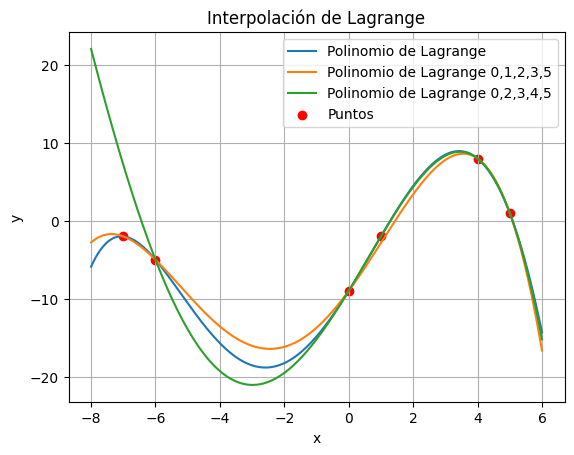

In [4]:
f = ((t - x[4])*polLagrange1(x,y,[0,1,2,3,5]) - (t - x[1])*polLagrange1(x,y,[0,2,3,4,5]))/(x[1]-x[4])
print(f)

x_new = np.linspace(np.amin(x)-1, np.amax(x)+1, 400)
y_new1 = [polLagrange1(x,y,[0,1,2,3,5]).subs(t, val) for val in x_new]
y_new2 = [polLagrange1(x,y,[0,2,3,4,5]).subs(t, val) for val in x_new] 
y_new = [f.subs(t, val) for val in x_new]

plt.plot(x_new, y_new, label='Polinomio de Lagrange')
plt.plot(x_new, y_new1, label='Polinomio de Lagrange 0,1,2,3,5')
plt.plot(x_new, y_new2, label='Polinomio de Lagrange 0,2,3,4,5')
plt.scatter(x, y, color='red', label='Puntos')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Interpolación de Lagrange')
plt.grid(True)
plt.show()



De acuerdo con el teorema los polinomios interpolante pueden generarse de forma recursiva 

|0|1|2|3|4|6|
|------|---------|---------|---------|---------|---------|
|$x_0$| $P_0 = Q_{0,0}$ |||||
|$x_1$| $P_1 = Q_{1,0}$|$P_{0,1} = Q_{1,1}$||||
|$x_2$| $P_2 = Q_{2,0}$|$P_{1,2} = Q_{2,1}$|$P_{0,1,2} = Q_{2,2}$|||
|$x_3$| $P_3 = Q_{3,0}$|$P_{2,3} = Q_{3,1}$|$P_{1,2,3} = Q_{3,2}$|$P_{0,1,2,3} = Q_{3,3}$||
|$x_4$| $P_4 = Q_{4,0}$|$P_{3,4} = Q_{4,1}$|$P_{2,3,4} = Q_{4,2}$|$P_{1,2,3,4} = Q_{4,3}$|$P_{0,1,2,3,4} = Q_{4,24}$|

**Definición.** Sea $Q_{i,j}(x)$, $0 \leq j \leq i$, el polinomio interpolante de grado $j$ en los $j+1$ números $x_{i-j}, x_{i-j+1}, \ldots, x_{i - 1}, x_i$, es decir $$Q_{i,j}(x) = P_{i-j, i-j+1, \ldots, i - 1, i}(x).$$

Haciendo uso de la noación se obtiene
$
\begin{align}
Q_{i,j}(x) & = \frac{(x - x_{i-j})P_{i-j+1, \ldots, i}(x) - (x - x_i)P_{i-j, \ldots, i-1}(x)}{x_i - x_{i-j}}\\\\
Q_{i,j}(x) & = \frac{(x - x_{i-j})Q_{i,j-1}(x) - (x - x_i)Q_{i-1,j-1}(x)}{x_i - x_{i-j}}\\
\end{align}
$

**Ejemplo.** Use el método de Neville para calcular el polinomio de interpolación en $x = \dfrac{\pi}{4}$ de los datos 

|x| 0|0.5|1|1.5|2|
|------|---------|---------|---------|---------|---------|
|y|-1.00|1.75|4.00|5.75|7.00|

In [5]:
x_dato = np.array([0,0.5,1,1.5,2], dtype = float)
y_dato = np.array([-1.00,1.75,4.00,5.75,7.00], dtype = float)

f1 = polLagrange1(x_dato,y_dato,[elem for elem in range(len(x_dato))])
print(f1)
print(f1.subs(t,np.pi/4))

-4.66666666666667*t*(t - 2.0)*(t - 1.5)*(t - 1.0) + 16.0*t*(t - 2.0)*(t - 1.5)*(t - 0.5) - 15.3333333333333*t*(t - 2.0)*(t - 1.0)*(t - 0.5) + 4.66666666666667*t*(t - 1.5)*(t - 1.0)*(t - 0.5) - 0.666666666666667*(t - 2.0)*(t - 1.5)*(t - 1.0)*(t - 0.5)
3.09553870531661


In [8]:
x_dato = np.array([0, 0.5, 1 , 1.5, 2], dtype = float)
y_dato = np.array([-1.00, 1.75, 4.00, 5.75, 7.00], dtype = float)

def neville(x,y,x_0):
    n = len(x)

    # Crear una matriz Q de ceros para almacenar los valores de interpolación
    Q = np.zeros((n,n))

     # Inicializar la primera columna de Q con los valores y
    for i in range(n):
        Q[i][0] = y[i]

    # Rellenar la tabla de Neville    
    for i in range(n):
        for j in range(1,i+1):
            Q[i][j] = ((x_0 - x[i-j])*Q[i][j-1] - (x_0 - x[i])*Q[i-1][j-1])/(x[i]-x[i-j])
    print(Q)

    return Q[n-1][n-1]
    
# Calcular el valor interpolado para x = pi/4
resultado = neville(x_dato, y_dato, np.pi/4)
print("\n")
print("Valor interpolado en x =", np.pi/4, "es", resultado)


[[-1.          0.          0.          0.          0.        ]
 [ 1.75        3.3196899   0.          0.          0.        ]
 [ 4.          3.03429174  3.09553871  0.          0.        ]
 [ 5.75        3.24889357  3.09553871  3.09553871  0.        ]
 [ 7.          3.96349541  3.09553871  3.09553871  3.09553871]]


Valor interpolado en x = 0.7853981633974483 es 3.095538705316605


In [10]:
from scipy.interpolate import lagrange
p1 = lagrange(x_dato,y_dato)
print(p1)

print(p1(np.pi/4))



           4             3     2
1.776e-15 x - 5.329e-15 x - 1 x + 6 x - 1
3.095538705316602
